## **i. Mount google drive**
---

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [32]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("pandas.   :", pd.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2
pandas.   : 1.1.5


## **iii. Append /iss/vse/data/ in your python path**
---

In [33]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [34]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [64]:
def cv2plt(img):
    plt.figure(figsize=(8,8))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7f5d409250d0>


## **vi. Setup YOLO v3**
---

In [93]:
lbl_file        = 'yolov3.txt'
classes         = open(lbl_file).read().strip().split("\n")

                                                # Read in the deep learning net
yoloconfig      = 'yolov3.cfg'
yoloweights     = 'yolov3.weights'
net             = cv2.dnn.readNet(yoloweights,yoloconfig)

pd.DataFrame(classes)                           # Display the first five and the last five classes

,0
0,person
1,bicycle
2,car
3,motorcycle
4,airplane
...,...
75,vase
76,scissors
77,teddy bear
78,hair drier


## **Question a**
---
Create a function that receives an image and returns bounding boxes and their corresponding class labels. The function should have the below signature:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;`def yoloV3Detect(img,scFactor=1/255,nrMean=(0,0,0),RBSwap=True,scoreThres=0.5,nmsThres=0.4)`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`...`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return [fboxes,fclasses]`<br><br>


Try to perform object detections on image 'sr1.jpg', 'sr2.jpg' and etc.

In [94]:
# Type your code below

def yoloV3Detect(img,scFactor=1/255,nrMean=(0,0,0),RBSwap=True,scoreThres=0.5,nmsThres=0.4):
  fboxes = []
  fclasses =[]
  blob = cv2.dnn.blobFromImage(image=img,
                               scalefactor=scFactor,
                               size=(416, 416),
                               mean=nrMean,
                               swapRB=RBSwap,
                               crop=False)

  imgHeight = img.shape[0]
  imgWidth = img.shape[1]  
  net.setInput(blob)
  layers = net.getLayerNames()
  outLyrs = [layers[i[0] - 1] for i in net.getUnconnectedOutLayers()]   
  preds = net.forward(outLyrs)  
  classId = []
  confidences = []
  boxes = []
  for scale in preds:
    for pred in scale:
      scores = pred[5:]
      clss = np.argmax(scores)
      confidence = scores[clss] 
      if confidence > 0.5:
        xc = int(pred[0]*imgWidth)
        yc = int(pred[1]*imgHeight)
        w = int(pred[2]*imgWidth)
        h = int(pred[3]*imgHeight)
        x = xc - w/2
        y = yc - h/2

        classId.append(clss)
        confidences.append(float(confidence))
        boxes.append([x, y, w, h])

  selected = cv2.dnn.NMSBoxes(bboxes=boxes,
                              scores=confidences,
                              score_threshold=scoreThres,
                              nms_threshold=nmsThres) 
  for j in selected[:,0]:
    fboxes.append(boxes[j])
    fclasses.append(str(classes[classId[j]]))

  return fboxes,fclasses


## **Question b**
---
Create a function that receives an image, `fboxes`, `fclasses` and `classes`, and produce the output in the below fashion.<br><br>

The name of the function should be `pltDetect`

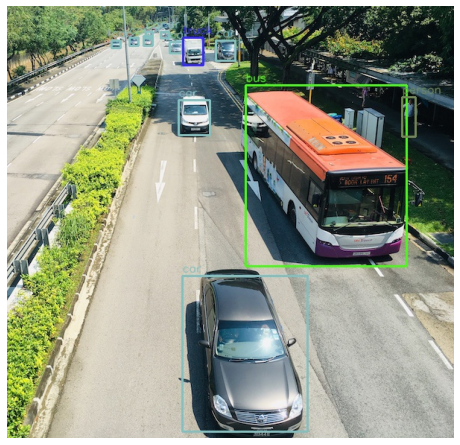

In [95]:
# Run the below to display the required type of output. The output below comes from image "sr6.jpg"

cv2plt(cv2.imread('wks3_3_b.jpg'))

In [115]:
def pltDetect(img,fboxes,fclasses,classes):
  colorset = np.random.uniform(0,255,size=(len(classes),3))
  df = pd.DataFrame(classes)
  for i, e in enumerate(fboxes):
    x = int(e[0])
    y = int(e[1])
    w = int(e[2])
    h = int(e[3])
    index = df[df[0]==fclasses[i]].index.values
    color = colorset[index[0]]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.putText(img,fclasses[i],(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA)
  cv2plt(img)

In [116]:
image = cv2.imread('sr6.jpg')
fboxes = yoloV3Detect(image)[0]
fclasses = yoloV3Detect(image)[1]

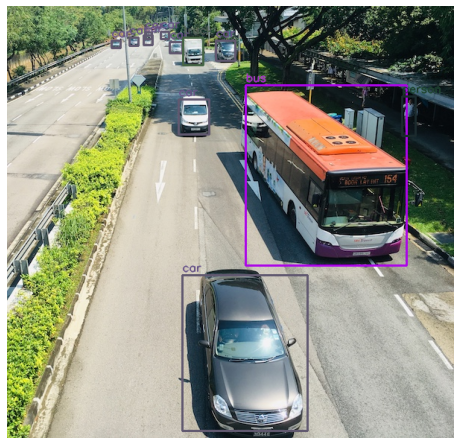

In [119]:
pltDetect(image,fboxes,fclasses,classes)